In [5]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
S238_path = '/Users/alexellard/Downloads/Hanoi_CMH/Scenario-238'
S239_path = '/Users/alexellard/Downloads/Hanoi_CMH/Scenario-239'
S240_path = '/Users/alexellard/Downloads/Hanoi_CMH/Scenario-240'
S249_path = '/Users/alexellard/Downloads/Hanoi_CMH/Scenario-249'
S251_path = '/Users/alexellard/Downloads/Hanoi_CMH/Scenario-251'

scenario_paths = [S238_path, S239_path, S240_path, S249_path, S251_path]

In [3]:
all_scenarios = []

for path in scenario_paths:

    demands_df = []
    flows_df = []
    pressures_df = []

    for files in path:
        timestamps = (path+'/Timestamps.csv')
        demands_path = glob.glob(path+'/Demands/*.csv')
        demands_path.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))
        flows_path = glob.glob(path+'/Flows/*.csv')
        flows_path.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))
        pressures_path = glob.glob(path+'/Pressures/*.csv')
        pressures_path.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))
    timestamps_df = pd.read_csv(timestamps)

    #Read demands
    for files in demands_path:
        df = pd.read_csv(files)
        demands_df.append(df)
    for i, df in enumerate(demands_df):
        demands_df[i] = pd.merge(df, timestamps_df, on='Index')
        demands_df[i].set_index('Timestamp', inplace=True)

    #Read flows
    for files in flows_path:
        df = pd.read_csv(files)
        flows_df.append(df)
    for i, df in enumerate(flows_df):
        flows_df[i] = pd.merge(df, timestamps_df, on='Index')
        flows_df[i].set_index('Timestamp', inplace=True)

    for files in pressures_path:
        df = pd.read_csv(files)
        pressures_df.append(df)
    for i, df in enumerate(pressures_df):
        pressures_df[i] = pd.merge(df, timestamps_df, on='Index')
        pressures_df[i].set_index('Timestamp', inplace=True)

    demands_merged_df = []
    for i in range(len(demands_df)):
        new_df = timestamps_df.merge(demands_df[i], on='Index')
        demands_merged_df.append(new_df)
    all_nodes_df = pd.concat(demands_merged_df, axis=1, join='inner')
    all_nodes_df = all_nodes_df.T.drop_duplicates().T

    demands_pressures_merged_df = []
    for i in range(len(pressures_df)):
        new_df = all_nodes_df.merge(pressures_df[i], on='Index')
        demands_pressures_merged_df.append(new_df)
    all_demands_pressures_df = pd.concat(demands_pressures_merged_df, axis=1, join='inner')
    all_demands_pressures_df = all_demands_pressures_df.T.drop_duplicates().T

    demands_pressures_flows_merged_df = []
    for i in range(len(flows_df)):
        new_df = all_demands_pressures_df.merge(flows_df[i], on='Index')
        demands_pressures_flows_merged_df.append(new_df)
    all_demands_pressures_flows_df = pd.concat(demands_pressures_flows_merged_df, axis=1, join='inner')
    all_demands_pressures_flows_df = all_demands_pressures_flows_df.T.drop_duplicates().T

    new_column_names_pressures_demands_flows = ['Index'] + ['Timestamp'] + ['reservoir_demand'] + [f'node_{i}_demand' for i in range(1, 32)] + ['reservoir_pressure'] + [f'node_{i}_pressure' for i in range(1, 32)] + [f'link_{i}_flow' for i in range(1, 33)]
    all_demands_pressures_flows_df.columns = new_column_names_pressures_demands_flows
    pd.set_option('display.max_columns', None)
    all_scenarios.append(all_demands_pressures_flows_df)
    
all_scenarios_merged_df = pd.concat(all_scenarios, axis=0)

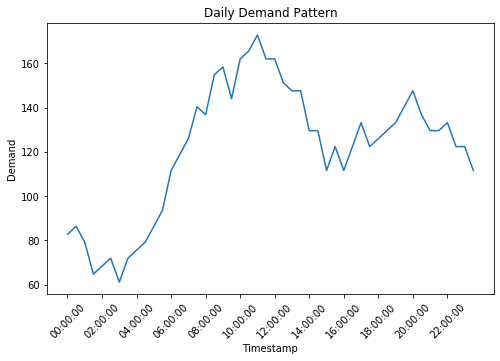

In [56]:
# Create a Matplotlib figure object and an Axes object
test_df = demands_df[10]
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Daily Demand Pattern')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Demand')

# Plot monthly demand
ax.plot(test_df.index[:48], test_df['Value'][:48])
# Set the desired frequency for x-axis ticks
frequency = 4  # Show every 4th item

# Calculate the tick positions and labels
x = ax.get_xlim()  # Get the current x-axis limits
tick_positions = test_df.index[:48:frequency]  # Select every 4th item from the x-axis data
tick_labels = [str(time).split()[1] for time in tick_positions]

# Set the new tick positions and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45)  # Rotate if needed
plt.savefig('/Users/alexellard/Downloads/DailyDemand.png')
# Show the plot
plt.show()

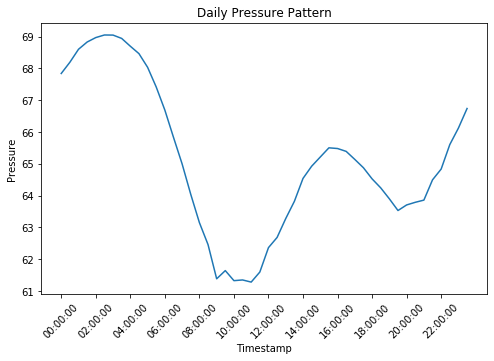

In [55]:
# Create a Matplotlib figure object and an Axes object
test_df = pressures_df[10]
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Daily Pressure Pattern')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Pressure')

# Plot monthly demand
ax.plot(test_df.index[:48], test_df['Value'][:48])
# Set the desired frequency for x-axis ticks
frequency = 4  # Show every 4th item

# Calculate the tick positions and labels
x = ax.get_xlim()  # Get the current x-axis limits
tick_positions = test_df.index[:48:frequency]  # Select every 4th item from the x-axis data
tick_labels = [str(time).split()[1] for time in tick_positions]

# Set the new tick positions and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45)  # Rotate if needed
plt.savefig('/Users/alexellard/Downloads/DailyPressure.png')
# Show the plot
plt.show()

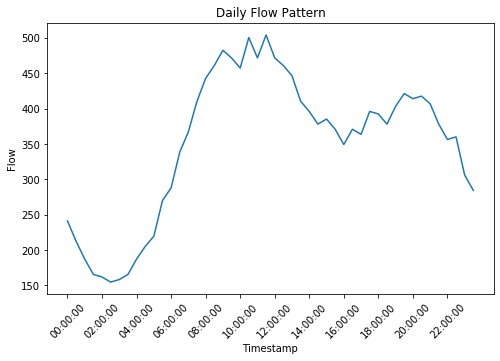

In [54]:
# Create a Matplotlib figure object and an Axes object
test_df = flows_df[10]
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Daily Flow Pattern')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Flow')

# Plot monthly demand
ax.plot(test_df.index[:48], test_df['Value'][:48])
# Set the desired frequency for x-axis ticks
frequency = 4  # Show every 4th item

# Calculate the tick positions and labels
x = ax.get_xlim()  # Get the current x-axis limits
tick_positions = test_df.index[:48:frequency]  # Select every 4th item from the x-axis data
tick_labels = [str(time).split()[1] for time in tick_positions]

# Set the new tick positions and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45)  # Rotate if needed
plt.savefig('/Users/alexellard/Downloads/Dailyflow.png')
# Show the plot
plt.show()

In [5]:
all_scenarios_merged_df

,Index,Timestamp,reservoir_demand,node_1_demand,node_2_demand,node_3_demand,node_4_demand,node_5_demand,node_6_demand,node_7_demand,node_8_demand,node_9_demand,node_10_demand,node_11_demand,node_12_demand,node_13_demand,node_14_demand,node_15_demand,node_16_demand,node_17_demand,node_18_demand,node_19_demand,node_20_demand,node_21_demand,node_22_demand,node_23_demand,node_24_demand,node_25_demand,node_26_demand,node_27_demand,node_28_demand,node_29_demand,node_30_demand,node_31_demand,reservoir_pressure,node_1_pressure,node_2_pressure,node_3_pressure,node_4_pressure,node_5_pressure,node_6_pressure,node_7_pressure,node_8_pressure,node_9_pressure,node_10_pressure,node_11_pressure,node_12_pressure,node_13_pressure,node_14_pressure,node_15_pressure,node_16_pressure,node_17_pressure,node_18_pressure,node_19_pressure,node_20_pressure,node_21_pressure,node_22_pressure,node_23_pressure,node_24_pressure,node_25_pressure,node_26_pressure,node_27_pressure,node_28_pressure,node_29_pressure,node_30_pressure,node_31_pressure,link_1_flow,link_2_flow,link_3_flow,link_4_flow,link_5_flow,link_6_flow,link_7_flow,link_8_flow,link_9_flow,link_10_flow,link_11_flow,link_12_flow,link_13_flow,link_14_flow,link_15_flow,link_16_flow,link_17_flow,link_18_flow,link_19_flow,link_20_flow,link_21_flow,link_22_flow,link_23_flow,link_24_flow,link_25_flow,link_26_flow,link_27_flow,link_28_flow,link_29_flow,link_30_flow,link_31_flow,link_32_flow
0,1,2017-01-01 00:00:00,-3348.0,154.8,169.2,18.0,118.8,169.2,234.0,86.4,82.8,104.4,72.0,86.4,151.2,93.6,46.8,61.2,144.0,237.6,10.8,237.6,133.2,79.2,169.2,140.4,25.2,129.6,54.0,54.0,61.2,61.2,21.6,136.8,0.0,69.852,68.928,68.667,68.424,68.065,68.019,67.966,67.912,67.865,67.822,67.772,67.545,67.803,67.804,67.96,68.229,68.51,68.828,68.652,68.369,68.091,68.423,68.296,68.186,68.069,67.977,68.001,67.768,67.758,67.791,67.898,3348.0,3193.2,1216.8,1198.8,1076.4,907.2,676.8,586.8,504.0,313.2,241.2,86.4,-7.2,-54.0,97.2,-241.2,-478.8,-489.6,1321.2,212.4,871.2,579.6,439.2,-205.2,-75.6,-18.0,118.8,68.4,7.2,-54.0,75.6,212.4
1,2,2017-01-01 00:30:00,-2959.2,136.8,147.6,18.0,108.0,144.0,237.6,79.2,75.6,90.0,64.8,75.6,147.6,86.4,43.2,61.2,111.6,194.4,10.8,194.4,122.4,72.0,133.2,126.0,21.6,118.8,50.4,46.8,57.6,57.6,18.0,111.6,0.0,69.882,69.148,68.926,68.718,68.411,68.371,68.327,68.282,68.244,68.206,68.161,67.945,68.198,68.2,68.361,68.629,68.844,69.076,68.936,68.702,68.483,68.758,68.655,68.566,68.465,68.379,68.411,68.212,68.211,68.245,68.343,2959.2,2822.4,1116.0,1101.6,990.0,846.0,608.4,529.2,453.6,291.6,226.8,72.0,-14.4,-57.6,97.2,-208.8,-403.2,-414.0,1144.8,190.8,759.6,518.4,392.4,-187.2,-72.0,-21.6,108.0,61.2,3.6,-54.0,72.0,183.6
2,3,2017-01-01 01:00:00,-2692.8,129.6,126.0,14.4,104.4,133.2,205.2,72.0,72.0,90.0,64.8,68.4,126.0,86.4,39.6,50.4,108.0,176.4,10.8,198.0,118.8,57.6,115.2,111.6,21.6,115.2,43.2,43.2,43.2,46.8,14.4,93.6,0.0,69.901,69.288,69.1,68.925,68.667,68.634,68.596,68.557,68.524,68.493,68.459,68.298,68.481,68.483,68.637,68.847,69.029,69.226,69.111,68.917,68.775,68.971,68.888,68.816,68.726,68.654,68.714,68.587,68.582,68.601,68.662,2692.8,2559.6,1018.8,1004.4,900.0,766.8,561.6,489.6,417.6,259.2,198.0,72.0,-14.4,-54.0,86.4,-190.8,-370.8,-378.0,1040.4,172.8,669.6,460.8,349.2,-176.4,-64.8,-18.0,93.6,50.4,3.6,-39.6,54.0,151.2
3,4,2017-01-01 01:30:00,-2379.6,104.4,100.8,10.8,86.4,122.4,180.0,68.4,57.6,82.8,57.6,57.6,118.8,64.8,32.4,46.8,90.0,147.6,7.2,183.6,111.6,54.0,108.0,100.8,14.4,104.4,43.2,36.0,36.0,43.2,14.4,90.0,0.0,69.921,69.428,69.28,69.141,68.936,68.909,68.879,68.849,68.823,68.797,68.769,68.625,68.799,68.8,68.901,69.087,69.231,69.381,69.276,69.095,68.962,69.159,69.091,69.032,68.958,68.907,68.958,68.847,68.836,68.85,68.898,2379.6,2278.8,896.4,882.0,799.2,676.8,496.8,428.4,370.8,234.0,176.4,50.4,-10.8,-43.2,79.2,-169.2,-316.8,-327.6,957.6,165.6,604.8,414.0,316.8,-158.4,-54.0,-10.8,79.2,46.8,7.2,-32.4,50.4,140.4
4,5,2017-01-01 02:00:00,-2228.4,104.4,104.4,10.8,79.2,122.4,183.6,68.4,54.0,75.6,46.8,50.4,111.6,54.0,32.4,43.2,90.0,

In [6]:
all_scenarios_merged_df = all_scenarios_merged_df.set_index('Timestamp')
all_scenarios_merged_df = all_scenarios_merged_df.drop(columns = ['Index'])
all_scenarios_merged_df.to_csv('/Users/alexellard/Downloads/scenarios_data.csv')

In [7]:
dataset = pd.read_csv('/Users/alexellard/Downloads/scenarios_data.csv', header=0, index_col=0)
dataset

,reservoir_demand,node_1_demand,node_2_demand,node_3_demand,node_4_demand,node_5_demand,node_6_demand,node_7_demand,node_8_demand,node_9_demand,node_10_demand,node_11_demand,node_12_demand,node_13_demand,node_14_demand,node_15_demand,node_16_demand,node_17_demand,node_18_demand,node_19_demand,node_20_demand,node_21_demand,node_22_demand,node_23_demand,node_24_demand,node_25_demand,node_26_demand,node_27_demand,node_28_demand,node_29_demand,node_30_demand,node_31_demand,reservoir_pressure,node_1_pressure,node_2_pressure,node_3_pressure,node_4_pressure,node_5_pressure,node_6_pressure,node_7_pressure,node_8_pressure,node_9_pressure,node_10_pressure,node_11_pressure,node_12_pressure,node_13_pressure,node_14_pressure,node_15_pressure,node_16_pressure,node_17_pressure,node_18_pressure,node_19_pressure,node_20_pressure,node_21_pressure,node_22_pressure,node_23_pressure,node_24_pressure,node_25_pressure,node_26_pressure,node_27_pressure,node_28_pressure,node_29_pressure,node_30_pressure,node_31_pressure,link_1_flow,link_2_flow,link_3_flow,link_4_flow,link_5_flow,link_6_flow,link_7_flow,link_8_flow,link_9_flow,link_10_flow,link_11_flow,link_12_flow,link_13_flow,link_14_flow,link_15_flow,link_16_flow,link_17_flow,link_18_flow,link_19_flow,link_20_flow,link_21_flow,link_22_flow,link_23_flow,link_24_flow,link_25_flow,link_26_flow,link_27_flow,link_28_flow,link_29_flow,link_30_flow,link_31_flow,link_32_flow
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,-3348.0,154.8,169.2,18.0,118.8,169.2,234.0,86.4,82.8,104.4,72.0,86.4,151.2,93.6,46.8,61.2,144.0,237.6,10.8,237.6,133.2,79.2,169.2,140.4,25.2,129.6,54.0,54.0,61.2,61.2,21.6,136.8,0.0,69.852,68.928,68.667,68.424,68.065,68.019,67.966,67.912,67.865,67.822,67.772,67.545,67.803,67.804,67.960,68.229,68.510,68.828,68.652,68.369,68.091,68.423,68.296,68.186,68.069,67.977,68.001,67.768,67.758,67.791,67.898,3348.0,3193.2,1216.8,1198.8,1076.4,907.2,676.8,586.8,504.0,313.2,241.2,86.4,-7.2,-54.0,97.2,-241.2,-478.8,-489.6,1321.2,212.4,871.2,579.6,439.2,-205.2,-75.6,-18.0,118.8,68.4,7.2,-54.0,75.6,212.4
2017-01-01 00:30:00,-2959.2,136.8,147.6,18.0,108.0,144.0,237.6,79.2,75.6,90.0,64.8,75.6,147.6,86.4,43.2,61.2,111.6,194.4,10.8,194.4,122.4,72.0,133.2,126.0,21.6,118.8,50.4,46.8,57.6,57.6,18.0,111.6,0.0,69.882,69.148,68.926,68.718,68.411,68.371,68.327,68.282,68.244,68.206,68.161,67.945,68.198,68.200,68.361,68.629,68.844,69.076,68.936,68.702,68.483,68.758,68.655,68.566,68.465,68.379,68.411,68.212,68.211,68.245,68.343,2959.2,2822.4,1116.0,1101.6,990.0,846.0,608.4,529.2,453.6,291.6,226.8,72.0,-14.4,-57.6,97.2,-208.8,-403.2,-414.0,1144.8,190.8,759.6,518.4,392.4,-187.2,-72.0,-21.6,108.0,61.2,3.6,-54.0,72.0,183.6
2017-01-01 01:00:00,-2692.8,129.6,126.0,14.4,104.4,133.2,205.2,72.0,72.0,90.0,64.8,68.4,126.0,86.4,39.6,50.4,108.0,176.4,10.8,198.0,118.8,57.6,115.2,111.6,21.6,115.2,43.2,43.2,43.2,46.8,14.4,93.6,0.0,69.901,69.288,69.100,68.925,68.667,68.634,68.596,68.557,68.524,68.493,68.459,68.298,68.481,68.483,68.637,68.847,69.029,69.226,69.111,68.917,68.775,68.971,68.888,68.816,68.726,68.654,68.714,68.587,68.582,68.601,68.662,2692.8,2559.6,1018.8,1004.4,900.0,766.8,561.6,489.6,417.6,259.2,198.0,72.0,-14.4,-54.0,86.4,-190.8,-370.8,-378.0,1040.4,172.8,669.6,460.8,349.2,-176.4,-64.8,-18.0,93.6,50.4,3.6,-39.6,54.0,151.2
2017-01-01 01:30:00,-2379.6,104.4,100.8,10.8,86.4,122.4,180.0,68.4,57.6,82.8,57.6,57.6,118.8,64.8,32.4,46.8,90.0,147.6,7.2,183.6,111.6,54.0,108.0,100.8,14.4,104.4,43.2,36.0,36.0,43.2,14.4,90.0,0.0,69.921,69.428,69.280,69.141,68.936,68.909,68.879,68.849,68.823,68.797,68.769,68.625,68.799,68.800,68.901,69.087,69.231,69.381,69.276,69.095,68.962,69.159,69.091,69.032,68.958,68.907,68.958,68.847,68.836,68.850,68.898,2379.6,2278.8,896.4,882.0,799.2,676.8,496.8,428.4,370.8,234.0,176.4,50.4,-10.8,-43.2,79.2,-169.2,-316.8,-327.6,957.6,165.6,604.8,414.0,316.8,-158.4,-54.0,-10.8,79.2,46.8,7.2,-32.4,50.4,140.4
2017-01-01 02:00:00,-2228.4,104.4